<a href="https://colab.research.google.com/github/edanyi/ed_RCEL506/blob/main/RCEL_506_CCS_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis (EDA)

## Raw GHG Data

### Data Import and EDA

- Pull in data stored in Github
- Understand dataframe layout and basic attributes

In [344]:
import pandas as pd
import numpy as np

# 2020 GHG emissions data
url1 = 'https://raw.githubusercontent.com/edanyi/ed_RCEL506/main/ghgp_data_2020.csv'
df1 = pd.read_csv(url1)

In [345]:
# Rows and columns
df1.shape

(6515, 66)

In [346]:
# All headings
print(list(df1.columns))

['Facility Id', 'FRS Id', 'Facility Name', 'City', 'State', 'Zip Code', 'Address', 'County', 'Latitude', 'Longitude', 'Primary NAICS Code', 'Industry Type (subparts)', 'Industry Type (sectors)', 'Total reported direct emissions', 'CO2 emissions (non-biogenic)', 'Methane (CH4) emissions ', 'Nitrous Oxide (N2O) emissions ', 'HFC emissions', 'PFC emissions', 'SF6 emissions ', 'NF3 emissions', 'Other Fully Fluorinated GHG emissions', 'HFE emissions', 'Very Short-lived Compounds emissions', 'Other GHGs (metric tons CO2e)', 'Biogenic CO2 emissions (metric tons)', 'Stationary Combustion', 'Electricity Generation', 'Adipic Acid Production', 'Aluminum Production', 'Ammonia Manufacturing', 'Cement Production', 'Electronics Manufacture', 'Ferroalloy Production', 'Fluorinated GHG Production', 'Glass Production', 'HCFC22 Production from HFC23 Destruction', 'Hydrogen Production', 'Iron and Steel Production', 'Lead Production', 'Lime Production', 'Magnesium Production', 'Miscellaneous Use of Carbonat

In [347]:
# Data preview

df1.head(3)

,Facility Id,FRS Id,Facility Name,City,State,Zip Code,Address,County,Latitude,Longitude,...,Titanium Dioxide Production,Underground Coal Mines,Zinc Production,Municipal Landfills,Industrial Wastewater Treatment,Manufacture of Electric Transmission and Distribution Equipment,Industrial Waste Landfills,CO2 used for NH3 / Lime?,Supplier of CO2?,CEMS?
0,1004377,1.100000e+11,121 REGIONAL DISPOSAL FACILITY,MELISSA,TX,75454,3820 SAM RAYBURN HIGHWAY,COLLIN COUNTY,33.30,-96.54,...,NaN,NaN,NaN,504064.0,NaN,NaN,NaN,N,N,N
1,1000112,1.100000e+11,23rd and 3rd,BROOKLYN,NY,11232,730 3rd Avenue,Kings,40.66,-74.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,N
2,1013621,1.100000e+11,3Bear Libby Gas Plant,Hobbs,NM,88240,674 Marathon Rd,LEA COUNTY,32.54,-103.52,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,N


In [348]:
# Meta Data
# Checking for data type (int/float v. object) and missing data

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6515 entries, 0 to 6514
Data columns (total 66 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Facility Id                                                      6515 non-null   int64  
 1   FRS Id                                                           6405 non-null   float64
 2   Facility Name                                                    6515 non-null   object 
 3   City                                                             6515 non-null   object 
 4   State                                                            6515 non-null   object 
 5   Zip Code                                                         6515 non-null   int64  
 6   Address                                                          6038 non-null   object 
 7   County                                    

### Data Cleaning

- Removing columns not relevant to analysis
- Separating into two dataframes - Facility Summary and Industry Emissions Summary
  - ***Facility Summary***: facility name/ID, state/city, latitude/longitude, regulation subparts, industry type, CO2e (including biogenic)
  - ***Industry Emissions Summary***: emissions by process/industry, checks for utilization and injection of CO2

#### Facility Summary

In [349]:
# Create new df for summary of site information

facilities=df1.iloc[:,[2,3,4,5,8,9,11,12,13,14,25]]
facilities.index=df1['Facility Id']
#facilities["Total CO2 Emissions (metric tons)"] = facilities['CO2 emissions (non-biogenic)'] + facilities["Biogenic CO2 emissions (metric tons)"]
facilities["Total CO2 Emissions (metric tons)"] = facilities['CO2 emissions (non-biogenic)']
facilities.head(50)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Facility Name,City,State,Zip Code,Latitude,Longitude,Industry Type (subparts),Industry Type (sectors),Total reported direct emissions,CO2 emissions (non-biogenic),Biogenic CO2 emissions (metric tons),Total CO2 Emissions (metric tons)
Facility Id,,,,,,,,,,,,
1004377,121 REGIONAL DISPOSAL FACILITY,MELISSA,TX,75454,33.30,-96.54,HH,Waste,504064.00,NaN,NaN,NaN
1000112,23rd and 3rd,BROOKLYN,NY,11232,40.66,-74.00,"C,D",Power Plants,60819.70,60751.2,NaN,60751.2
1013621,3Bear Libby Gas Plant,Hobbs,NM,88240,32.54,-103.52,"C,W-PROC",Petroleum and Natural Gas Systems,40521.81,39555.5,NaN,39555.5
1003742,31st Street Landfill,WESTCHESTER,IL,60154,41.84,-87.92,"C,HH",Waste,100500.95,334.9,NaN,334.9
1003188,3M BROWNWOOD,BROWNWOOD,TX,76801,31.67,-99.00,"C,N",Minerals,29359.64,29329.5,NaN,29329.5
1005043,3M CO,MAPLEWOOD,MN,55144,44.95,-93.00,C,Other,82308.24,82223.0,NaN,82223.0
1012037,50 Buttes Gas Plant,Gillette,WY,82716,43.76,-105.79,"C,W-PROC",Petroleum and Natural Gas Systems,72243.54,70339.7,NaN,70339.7
1003739,3M CO - GUIN,GUIN,AL,35563,33.97,-87.90,"C,N",Minerals,27083.00,27055.6,NaN,27055.6
1007698,3M CO - WAUSAU DOWNTOWN,WAUSAU,WI,54401,44.95,-89.64,C,Other,46909.12,46851.2,NaN,46851.2


In [350]:
# Checking if all data is present
# Exceptions - facilities with non-CO2 GHG emissions only (e.g. refrigerants)
# Exception - facilities with some or all CO2 emissions as biogenic

facilities.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6515 entries, 1004377 to 1011696
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Facility Name                         6515 non-null   object 
 1   City                                  6515 non-null   object 
 2   State                                 6515 non-null   object 
 3   Zip Code                              6515 non-null   int64  
 4   Latitude                              6515 non-null   float64
 5   Longitude                             6515 non-null   float64
 6   Industry Type (subparts)              6515 non-null   object 
 7   Industry Type (sectors)               6515 non-null   object 
 8   Total reported direct emissions       6515 non-null   float64
 9   CO2 emissions (non-biogenic)          5858 non-null   float64
 10  Biogenic CO2 emissions (metric tons)  564 non-null    float64
 11  Total CO

In [351]:
# Exclude all sources reporting only non-CO2 GHGs (e.g. CH4, refrigerants, etc) 
# For each source, check if either biogenic or non-biogenic column has a value
# Only keep the sources that satisfy this condition - np.logical_or()

biogenic=facilities['Biogenic CO2 emissions (metric tons)'].notna()
non_biogenic=facilities['CO2 emissions (non-biogenic)'].notna()
co2_filter = np.logical_or(biogenic,non_biogenic)
co2_facilities = facilities[co2_filter]

In [352]:
# 5896 sources are applicable for this project
# 564 sources with some amount of biogenic CO2
# 38 sources with only biogenic CO2

co2_facilities.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5896 entries, 1000112 to 1011696
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Facility Name                         5896 non-null   object 
 1   City                                  5896 non-null   object 
 2   State                                 5896 non-null   object 
 3   Zip Code                              5896 non-null   int64  
 4   Latitude                              5896 non-null   float64
 5   Longitude                             5896 non-null   float64
 6   Industry Type (subparts)              5896 non-null   object 
 7   Industry Type (sectors)               5896 non-null   object 
 8   Total reported direct emissions       5896 non-null   float64
 9   CO2 emissions (non-biogenic)          5858 non-null   float64
 10  Biogenic CO2 emissions (metric tons)  564 non-null    float64
 11  Total CO

In [353]:
co2_facilities.iloc[860:900,[0,4,5,6,11]]

,Facility Name,Latitude,Longitude,Industry Type (subparts),Total CO2 Emissions (metric tons)
Facility Id,,,,,
1007625,CHALMETTE REFINING LLC - CHALMETTE REFINERY,29.94,-89.97,"C,MM-REF,Y",1484716.5
1002859,CHANNELVIEW COMPLEX,29.83,-95.12,"C,MM-EXP,X",2053062.1
1000394,CHAPARRAL STEEL,37.18,-77.45,"C,Q",110527.4
1005344,CHAPARRAL STEEL MIDLOTHIAN PLANT,32.46,-97.04,"C,Q",250456.4
1007714,CHAPEL HILL GAS PLANT,32.37,-95.11,"C,NN-FRAC,W-PROC",11060.1
1005107,CHARLES COUNTY LANDFILL,38.57,-76.88,"C,HH",31.8
1004491,CHARLES M HINTON JR REGIONAL LANDFILL,32.96,-96.53,"C,HH",4.1
1001909,CHARLOTTE CO.BOARD OF CO.COMMISIONERS,26.80,-81.96,"C,HH",NaN
1004911,CHARLOTTE PIPE & FOUNDRY CO,35.22,-80.86,C,47922.7


In [354]:
# Facilities not considered
# 5896 + 619 = 6515 total sources (as in original dataframe)

missing_non_bio=facilities['CO2 emissions (non-biogenic)'].isna()     # no value
missing_bio=facilities['Biogenic CO2 emissions (metric tons)'].isna() # no value
filter = np.logical_and(missing_non_bio,missing_bio)
non_co2_facilities = facilities[filter]
non_co2_facilities.shape

(619, 12)

#### Industry Emissions Summary
- Creating dataframe for industrial sector emissions from each facility
- Facility may be reporting under multiple industrial sectors (i.e. subparts)

In [355]:
# Create new df for emissions data by industrial sector
# Include non-biogenic & biogenic data columns to allow for filtering

emissions = df1.loc[:,['CO2 emissions (non-biogenic)','Biogenic CO2 emissions (metric tons)']]
emissions.index = df1['Facility Id']
sectors = df1.iloc[:,26:]
sectors.index = df1['Facility Id']
industries = pd.concat([emissions,sectors],axis=1) # concatenate df's together
industries.shape

(6515, 42)

In [356]:
# Exclude all sources reporting only non-CO2 GHGs (e.g. CH4, refrigerants, etc) 
# For each source, check if either biogenic or non-biogenic column has a value
# Only keep the sources that satisfy this condition - np.logical_or()

biogenic=industries['Biogenic CO2 emissions (metric tons)'].notna()
non_biogenic=industries['CO2 emissions (non-biogenic)'].notna()
co2_filter = np.logical_or(biogenic,non_biogenic)
co2_industries = industries[co2_filter]

# Drop non-biogenic & biogenic data columns

co2_industries=co2_industries.drop(columns=['Biogenic CO2 emissions (metric tons)',
                                            'CO2 emissions (non-biogenic)'])
co2_industries.head(3)

,Stationary Combustion,Electricity Generation,Adipic Acid Production,Aluminum Production,Ammonia Manufacturing,Cement Production,Electronics Manufacture,Ferroalloy Production,Fluorinated GHG Production,Glass Production,...,Titanium Dioxide Production,Underground Coal Mines,Zinc Production,Municipal Landfills,Industrial Wastewater Treatment,Manufacture of Electric Transmission and Distribution Equipment,Industrial Waste Landfills,CO2 used for NH3 / Lime?,Supplier of CO2?,CEMS?
Facility Id,,,,,,,,,,,,,,,,,,,,,
1000112,199.10,60620.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,N
1013621,29729.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,N
1003742,335.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,100165.5,NaN,NaN,NaN,N,N,N


## Regulatory Subpart Data

### Data Import and EDA

- Pull in data stored in Github
- Understand dataframe layout and basic attributes

In [357]:
import pandas as pd
import numpy as np

# Regulatory subparts for each industry

url2 = 'https://raw.githubusercontent.com/edanyi/ed_RCEL506/main/ghgp_industries.csv'
df2 = pd.read_csv(url2)

In [358]:
# Setting index as the regulatory subpart letter

df2.index = df2['Subpart Letter']
subparts = df2.loc[:,['Name of industry','Facility Type']]
subparts.head(3)

,Name of industry,Facility Type
Subpart Letter,,
C,Stationary Combustion,Direct Emitter
D,Electricity Generation,Direct Emitter
E,Adipic Acid Production,Direct Emitter


In [359]:
# Checking if all data is present

subparts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56 entries, C to UU
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name of industry  56 non-null     object
 1   Facility Type     56 non-null     object
dtypes: object(2)
memory usage: 1.3+ KB


## Clean Data Summary

- 3 dataframes are generated to summarize the data for this analysis
  - ***co2_facilities***: all US industrial facilities that emit CO2 emissions (2020 data)
  - ***subparts***: correlates EPA GHG reporting program regulatory subpart (CFR Part 98) to each type of industry
  - ***co2_industries***: CO2 emissions for each facility, broken down by regulatory subpart (i.e. industry)

In [360]:
co2_facilities.head(3)

,Facility Name,City,State,Zip Code,Latitude,Longitude,Industry Type (subparts),Industry Type (sectors),Total reported direct emissions,CO2 emissions (non-biogenic),Biogenic CO2 emissions (metric tons),Total CO2 Emissions (metric tons)
Facility Id,,,,,,,,,,,,
1000112,23rd and 3rd,BROOKLYN,NY,11232,40.66,-74.00,"C,D",Power Plants,60819.70,60751.2,NaN,60751.2
1013621,3Bear Libby Gas Plant,Hobbs,NM,88240,32.54,-103.52,"C,W-PROC",Petroleum and Natural Gas Systems,40521.81,39555.5,NaN,39555.5
1003742,31st Street Landfill,WESTCHESTER,IL,60154,41.84,-87.92,"C,HH",Waste,100500.95,334.9,NaN,334.9


In [361]:
subparts.head(3)

,Name of industry,Facility Type
Subpart Letter,,
C,Stationary Combustion,Direct Emitter
D,Electricity Generation,Direct Emitter
E,Adipic Acid Production,Direct Emitter


In [362]:
co2_industries.head(3)

,Stationary Combustion,Electricity Generation,Adipic Acid Production,Aluminum Production,Ammonia Manufacturing,Cement Production,Electronics Manufacture,Ferroalloy Production,Fluorinated GHG Production,Glass Production,...,Titanium Dioxide Production,Underground Coal Mines,Zinc Production,Municipal Landfills,Industrial Wastewater Treatment,Manufacture of Electric Transmission and Distribution Equipment,Industrial Waste Landfills,CO2 used for NH3 / Lime?,Supplier of CO2?,CEMS?
Facility Id,,,,,,,,,,,,,,,,,,,,,
1000112,199.10,60620.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,N
1013621,29729.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,N
1003742,335.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,100165.5,NaN,NaN,NaN,N,N,N


# Industry Summaries


- Categorizing facilities by industry
- Perform basic statistics on each industrial sector
- Primary focus on the following industries (*priority_industries*):
  - Electricity Generation (Coal Power/Natural Gas)
  - Petroleum and Natural Gas Systems - Processing   
  - Ethanol (*not reported because biogenic*) 
  - Ammonia Manufacturing
  - Hydrogen Production
  - Cement Production
  - Petroleum Refining (FCC)
  - Iron and Steel Production
  - Stationary Combustion (Industrial Furnaces)

In [363]:
# Number of industries
# Last two columns are not industries

co2_industries.columns[:-3].nunique()

37

In [364]:
# Sum of facilities in each industry
# If missing value, facility does not belong to that industry/subpart

co2_industries.notna().sum()

Stationary Combustion                                              5463
Electricity Generation                                             1106
Adipic Acid Production                                                2
Aluminum Production                                                   7
Ammonia Manufacturing                                                29
Cement Production                                                    92
Electronics Manufacture                                              48
Ferroalloy Production                                                 9
Fluorinated GHG Production                                           14
Glass Production                                                    101
HCFC22 Production from HFC23 Destruction                              5
Hydrogen Production                                                 114
Iron and Steel Production                                           122
Lead Production                                                 

In [365]:
# Basic statistics for each industry
# Note - the cells without values are not counted

co2_industries['Electricity Generation'].describe()

count    1.106000e+03
mean     1.300664e+06
std      2.077510e+06
min      0.000000e+00
25%      7.077331e+04
50%      4.635323e+05
75%      1.617321e+06
max      1.723290e+07
Name: Electricity Generation, dtype: float64

In [366]:
# Function to plot histogram for one industrial sectors
# Option for Sturge's rule for number of bins

def histogram(header):

  import seaborn as sns
  import matplotlib.pyplot as plt

  #bin_count = 1 + np.ceil(np.log2(co2_industries[header].count()))   
  bin_count = 8 + np.ceil(np.log2(co2_industries[header].count()))    
  fig, ax = plt.subplots()
  sns.histplot(data=co2_industries[header],bins=int(bin_count))
  ax.set_xlabel("CO2 Emissions (mtpa)")
  ax.set_ylabel("# of Facilities",rotation=0,labelpad=45)
  ax.set_title(header)


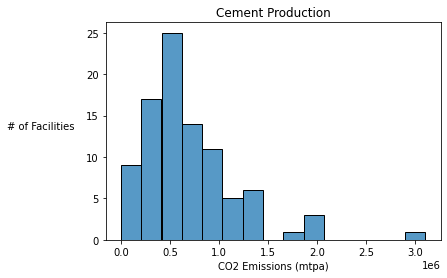

In [367]:
histogram('Cement Production')

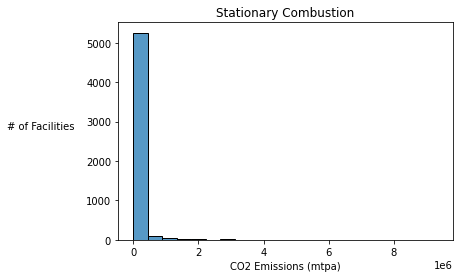

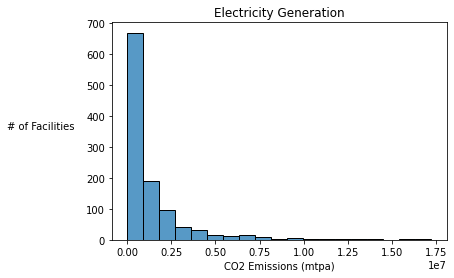

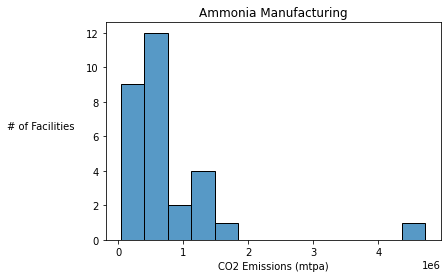

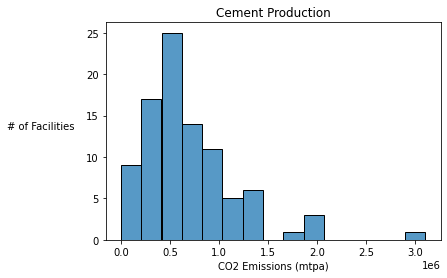

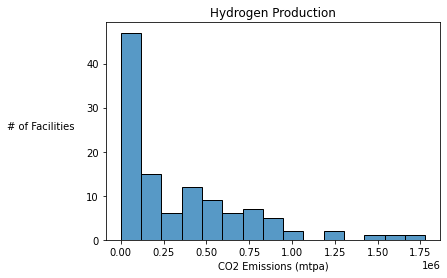

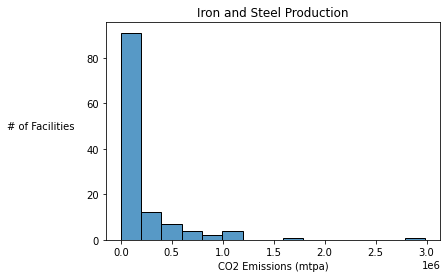

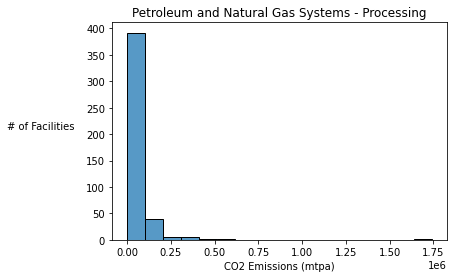

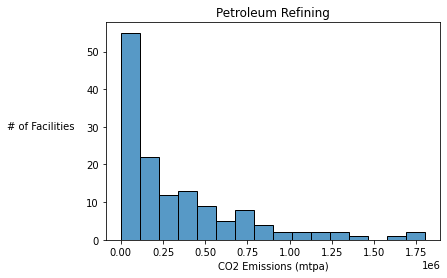

In [368]:
# Only considering priority industries

priority_industries = co2_industries.iloc[:,[0,1,4,5,11,12,19,25]]

for labels,content in priority_industries.items():
  histogram(labels)
  

Text(0.5, 0, 'CO2 Emissions (mtpa)')

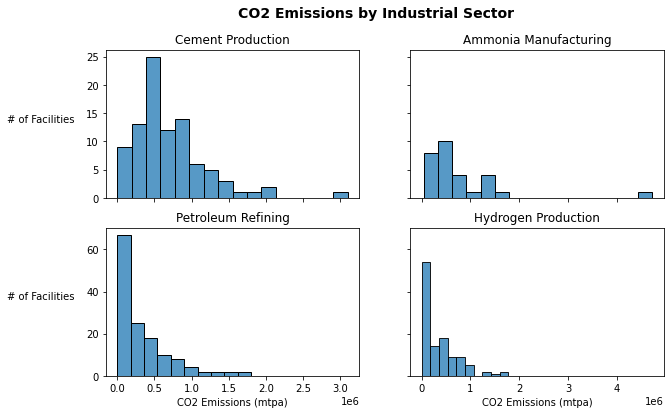

In [369]:
import seaborn as sns
import matplotlib.pyplot as plt


fig, axs = plt.subplots(2,2,figsize=(10,6),sharex='col',sharey='row')

fig.suptitle("CO2 Emissions by Industrial Sector", fontweight = "bold",fontsize=14,y=.98)

sns.histplot(data=co2_industries['Cement Production'],ax=axs[0,0])
axs[0,0].set_title('Cement Production')
axs[0,0].set_xlabel("")
axs[0,0].set_ylabel("# of Facilities",rotation=0,labelpad=45)

sns.histplot(data=co2_industries['Ammonia Manufacturing'],ax=axs[0,1])
axs[0,1].set_title('Ammonia Manufacturing')
axs[0,1].set_ylabel("")
axs[0,1].set_xlabel("")

sns.histplot(data=co2_industries['Petroleum Refining'],ax=axs[1,0])
axs[1,0].set_title('Petroleum Refining')
axs[1,0].set_ylabel("# of Facilities",rotation=0,labelpad=45)
axs[1,0].set_xlabel("CO2 Emissions (mtpa)")

sns.histplot(data=co2_industries['Hydrogen Production'],ax=axs[1,1])
axs[1,1].set_title('Hydrogen Production')
axs[1,1].set_ylabel("")
axs[1,1].set_xlabel("CO2 Emissions (mtpa)")

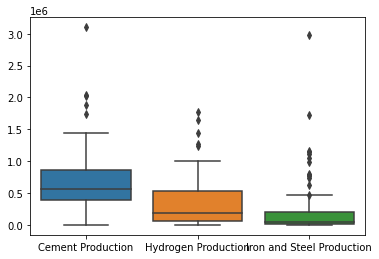

In [370]:
# Box plot

co2_industries.iloc[:,[0,25]]
sns.boxplot(data=co2_industries.iloc[:,[5,11,12]])
plt.show()

# Facility Classification

- Classify each facility into it's respective industrial sectors (i.e. based on regulatory subpart)
  - Extract values from 'Industry Type (subparts)' columns
  - Sort individual subparts into separate new columns in the dataframe
  - Correlate subpart(s) to industry type(s) using *subparts( )* dataframe

## Separate String of Subparts into Separate Elements

In [371]:
co2_facilities.loc[:,'Industry Type (subparts)']

Facility Id
1000112         C,D
1013621    C,W-PROC
1003742        C,HH
1003188         C,N
1005043           C
             ...   
1010592    C,W-PROC
1000805         C,D
1001464           D
1012625         C,Q
1011696        C,HH
Name: Industry Type (subparts), Length: 5896, dtype: object

In [372]:
# For each row, test splitting element contents separated by a comma

co2_facilities.loc[1013621,'Industry Type (subparts)'].split(',')

['C', 'W-PROC']

In [373]:
# To determine individual subparts for each facility,
# First count number of individual subparts for each facility
# Create new column in dataframe to hold the total subparts per facility
# New column equals the old column with lambda function applied
# lambda syntax = variables:operations 
# Determine length of string created by the split function

co2_facilities['# of Subparts']=co2_facilities['Industry Type (subparts)'].apply(lambda x:len(x.split(',')))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [374]:
# Function to split element contents separated by a comma
# For each element, use an index to count each subpart
# Once # of subparts exceeds the index, function returns nan 

def splitter(value,index):
  try:
    return value.split(',')[index]
  except:
    return np.nan

In [375]:
# Test - facility 1013621 has two subparts (index = 0,1,nan,...)

splitter(co2_facilities.loc[1013621,'Industry Type (subparts)'],1)

'W-PROC'

In [376]:
# Create new column for first subpart of each facility (index = 0)
# New column equals the old column with lambda function applied
# Lambda function uses splitter() function to split element and select indexed item in list

co2_facilities['Subpart 1']=co2_facilities['Industry Type (subparts)'].apply(lambda x:splitter(x,0))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [377]:
# Test - new column created, containing only first subpart in the list

co2_facilities['Subpart 1']

Facility Id
1000112    C
1013621    C
1003742    C
1003188    C
1005043    C
          ..
1010592    C
1000805    C
1001464    D
1012625    C
1011696    C
Name: Subpart 1, Length: 5896, dtype: object

In [378]:
# For the entire column, testing the maximum number of subparts for a facility

co2_facilities['# of Subparts'].max()

6

In [379]:
# Loop to create 6 columns (maximum number of subparts for a given facility)

for n in range(1,7):
  co2_facilities['Subpart '+str(n)]=co2_facilities['Industry Type (subparts)'].apply(lambda x:splitter(x,n-1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [380]:
co2_facilities.head(3)

,Facility Name,City,State,Zip Code,Latitude,Longitude,Industry Type (subparts),Industry Type (sectors),Total reported direct emissions,CO2 emissions (non-biogenic),Biogenic CO2 emissions (metric tons),Total CO2 Emissions (metric tons),# of Subparts,Subpart 1,Subpart 2,Subpart 3,Subpart 4,Subpart 5,Subpart 6
Facility Id,,,,,,,,,,,,,,,,,,,
1000112,23rd and 3rd,BROOKLYN,NY,11232,40.66,-74.00,"C,D",Power Plants,60819.70,60751.2,NaN,60751.2,2,C,D,NaN,NaN,NaN,NaN
1013621,3Bear Libby Gas Plant,Hobbs,NM,88240,32.54,-103.52,"C,W-PROC",Petroleum and Natural Gas Systems,40521.81,39555.5,NaN,39555.5,2,C,W-PROC,NaN,NaN,NaN,NaN
1003742,31st Street Landfill,WESTCHESTER,IL,60154,41.84,-87.92,"C,HH",Waste,100500.95,334.9,NaN,334.9,2,C,HH,NaN,NaN,NaN,NaN


## Replace subpart letter with industry name

In [381]:
# Looking to swap Subpart letter in co2_facilities with industry name

subparts.head(3)

,Name of industry,Facility Type
Subpart Letter,,
C,Stationary Combustion,Direct Emitter
D,Electricity Generation,Direct Emitter
E,Adipic Acid Production,Direct Emitter


In [382]:
# Test filter of facilities by individual subpart

stat_combustion = co2_facilities[co2_facilities['Subpart 1']==subparts.index[0]]
stat_combustion.head(3)

,Facility Name,City,State,Zip Code,Latitude,Longitude,Industry Type (subparts),Industry Type (sectors),Total reported direct emissions,CO2 emissions (non-biogenic),Biogenic CO2 emissions (metric tons),Total CO2 Emissions (metric tons),# of Subparts,Subpart 1,Subpart 2,Subpart 3,Subpart 4,Subpart 5,Subpart 6
Facility Id,,,,,,,,,,,,,,,,,,,
1000112,23rd and 3rd,BROOKLYN,NY,11232,40.66,-74.00,"C,D",Power Plants,60819.70,60751.2,NaN,60751.2,2,C,D,NaN,NaN,NaN,NaN
1013621,3Bear Libby Gas Plant,Hobbs,NM,88240,32.54,-103.52,"C,W-PROC",Petroleum and Natural Gas Systems,40521.81,39555.5,NaN,39555.5,2,C,W-PROC,NaN,NaN,NaN,NaN
1003742,31st Street Landfill,WESTCHESTER,IL,60154,41.84,-87.92,"C,HH",Waste,100500.95,334.9,NaN,334.9,2,C,HH,NaN,NaN,NaN,NaN


In [383]:
# Test access industry name from subparts dataframe

subparts['Name of industry'].loc['C']

'Stationary Combustion'

In [384]:
# Test access subpart letter from co2_facilities dataframe

co2_facilities['Subpart 1'].loc[1000112]

'C'

In [385]:
# Test swap of subpart letter with industry name
# Can only run this cell once (input of new value dependent on previous value)

# co2_facilities['Subpart 1'].loc[1001033] = subparts['Name of industry'].loc[co2_facilities['Subpart 1'].loc[1001033]]
# co2_facilities.head(1)

In [333]:
#for label,row in co2_facilities.iterrows():
  #row['Subpart 1'].loc[label] = subparts['Name of industry'].loc[row['Subpart 1'].loc[label]]
  #print(row['Subpart 1'])
  #print(subparts['Name of industry'].loc[row['Subpart 1']])
  #row['Subpart 1'] = subparts['Name of industry'].loc[row['Subpart 1']]

In [386]:
# Replace all subpart letters with industry name

co2_facilities['Subpart 1'] = co2_facilities['Subpart 1'].replace(to_replace=subparts.index,value=subparts['Name of industry'])
co2_facilities['Subpart 2'] = co2_facilities['Subpart 2'].replace(to_replace=subparts.index,value=subparts['Name of industry'])
co2_facilities['Subpart 3'] = co2_facilities['Subpart 3'].replace(to_replace=subparts.index,value=subparts['Name of industry'])
co2_facilities['Subpart 4'] = co2_facilities['Subpart 4'].replace(to_replace=subparts.index,value=subparts['Name of industry'])
co2_facilities['Subpart 5'] = co2_facilities['Subpart 5'].replace(to_replace=subparts.index,value=subparts['Name of industry'])
co2_facilities['Subpart 6'] = co2_facilities['Subpart 6'].replace(to_replace=subparts.index,value=subparts['Name of industry'])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [393]:
# Test check for facilities reporting under 4 or more subparts

co2_facilities[co2_facilities['# of Subparts']>4]

,Facility Name,City,State,Zip Code,Latitude,Longitude,Industry Type (subparts),Industry Type (sectors),Total reported direct emissions,CO2 emissions (non-biogenic),Biogenic CO2 emissions (metric tons),Total CO2 Emissions (metric tons),# of Subparts,Subpart 1,Subpart 2,Subpart 3,Subpart 4,Subpart 5,Subpart 6
Facility Id,,,,,,,,,,,,,,,,,,,
1004962,Ascend Performance Materials LLC,Cantonment,FL,32533,30.60,-87.25,"C,E,P,TT,V","Chemicals,Waste",9192846.35,988514.30,NaN,988514.30,5,Stationary Combustion,Adipic Acid Production,Hydrogen Production,Industrial Waste Landfills,Nitric Acid Production,NaN
1002963,BOISE WHITE PAPER MILL,JACKSON,AL,36545,31.49,-87.90,"AA,C,II,PP,TT","Pulp and Paper,Suppliers of CO2,Waste",105056.76,97225.70,398070.9,97225.70,5,Pulp and Paper Manufacturing,Stationary Combustion,Industrial Wastewater Treatment,Carbon Dioxide (CO2) Supply,Industrial Waste Landfills,NaN
1006301,BORGER REFINERY,BORGER,TX,79008,35.70,-101.36,"C,MM-REF,P,TT,Y","Chemicals,Petroleum Product Suppliers,Refineri...",1975631.64,1933926.20,NaN,1933926.20,5,Stationary Combustion,Petroleum Refinery (Producer),Hydrogen Production,Industrial Waste Landfills,Petroleum Refining,NaN
1006468,BP CHERRY POINT REFINERY,BLAINE,WA,98230,48.88,-122.74,"C,MM-REF,P,PP,Y","Chemicals,Petroleum Product Suppliers,Refineri...",2121888.45,2111839.40,NaN,2111839.40,5,Stationary Combustion,Petroleum Refinery (Producer),Hydrogen Production,Carbon Dioxide (CO2) Supply,Petroleum Refining,NaN
1007339,BP Whiting Business Unit,WHITING,IN,46394,41.67,-87.48,"C,D,DD,MM-REF,P,Y","Chemicals,Other,Petroleum Product Suppliers,Po...",5106325.56,5083903.90,NaN,5083903.90,6,Stationary Combustion,Electricity Generation,SF6 from Electrical Equipment,Petroleum Refinery (Producer),Hydrogen Production,Petroleum Refining
1007367,BPE GPRP Grasslands Gas Plant,Cartwright,ND,58838,47.59,-104.00,"C,NN-FRAC,PP,UU,W-PROC","Injection of CO2,Natural Gas and Natural Gas L...",77750.86,63437.20,NaN,63437.20,5,Stationary Combustion,Natural Gas Liquids Fractionator,Carbon Dioxide (CO2) Supply,Injection of Carbon Dioxide,Petroleum and Natural Gas Systems-Natural Gas ...,NaN
1002040,DOW TEXAS OPERATIONS FREEPORT,FREEPORT,TX,77541,28.98,-95.35,"C,DD,TT,W-UNSTG,X","Chemicals,Other,Petroleum and Natural Gas Syst...",4670152.59,4535625.10,NaN,4535625.10,5,Stationary Combustion,SF6 from Electrical Equipment,Industrial Waste Landfills,Petroleum and Natural Gas Systems-Underground ...,Petrochemical Production,NaN
1007322,Delaware City Refinery,DELAWARE CITY,DE,19706,39.59,-75.63,"C,D,MM-REF,P,PP,Y","Chemicals,Petroleum Product Suppliers,Power Pl...",3508262.75,3498314.70,NaN,3498314.70,6,Stationary Combustion,Electricity Generation,Petroleum Refinery (Producer),Hydrogen Production,Carbon Dioxide (CO2) Supply,Petroleum Refining
1007959,Exxonmobil Beaumont Refinery,BEAUMONT,TX,77701,30.06,-94.07,"C,D,MM-REF,X,Y","Chemicals,Petroleum Product Suppliers,Power Pl...",5969593.13,5937475.70,NaN,5937475.70,5,Stationary Combustion,Electricity Generation,Petroleum Refinery (Producer),Petrochemical Production,Petroleum Refining,NaN
